In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
#connecting to csv dataset file stored in google drive and fetch the data from there
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RealTime_Pizza_Prices.csv')
df.columns = ['Size', 'Price']
df.head()

,Size,Price
0,13,668
1,10,407
2,11,492
3,13,614
4,9,403


In [ ]:
#splitting the data into 2 parts. training and test. 80% data for training and 20% data for test.
from sklearn.model_selection import train_test_split

X = df[['Size']]
y = df['Price']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#Create and train model
from sklearn.linear_model import LinearRegression

# Create model and train
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict test set values
y_pred = model.predict(X_test)

# Compare actual vs predicted
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print(results)

    Actual   Predicted
0      142  200.067794
1      632  671.112655
2      321  278.575270
3      635  592.605178
4      160  200.067794
..     ...         ...
95     553  514.097701
96     466  435.590224
97     543  514.097701
98     581  592.605178
99     465  435.590224

[100 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


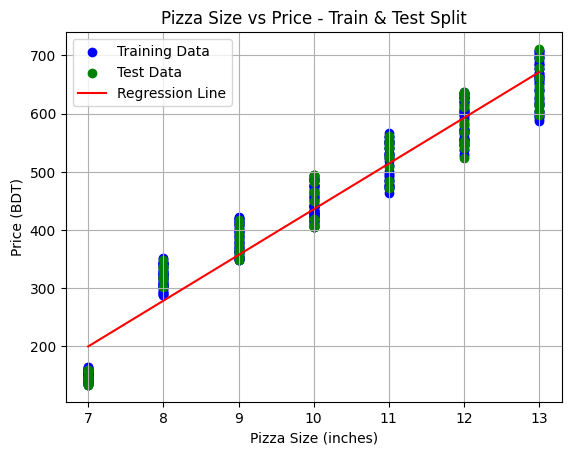

In [ ]:
#visualizing the dataset in a graph
import numpy as np
import matplotlib.pyplot as plt

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data')

# Plot regression line using full range of inputs
X_range = np.linspace(df['Size'].min(), df['Size'].max(), 100).reshape(-1,1)
y_range_pred = model.predict(X_range)

plt.plot(X_range, y_range_pred, color='red', label='Regression Line')

plt.xlabel("Pizza Size (inches)")
plt.ylabel("Price (BDT)")
plt.title("Pizza Size vs Price - Train & Test Split")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Accuracy Score (R²)
from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_pred)
print(f"Model Accuracy (R² Score): {accuracy:.2f}")

Model Accuracy (R² Score): 0.94


In [ ]:
import pickle
pickle.dump(model, open('pizza_model.pkl', 'wb'))

In [ ]:
import os

print("Files in current directory:")
print(os.listdir('.'))


Files in current directory:
['.config', 'pizza_model.pkl', 'drive', 'sample_data']


In [ ]:
from google.colab import files
files.download('pizza_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>